## Neural Networks and Deep Learning

In [21]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import os
import zipfile
import requests
import shutil

In [38]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [39]:
DATA_URL = "https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip"
DATA_ZIP = "data.zip"
DATA_DIR = "data"

In [40]:
def download_dataset(url, zip_path):
    if not os.path.exists(zip_path):
        print(f"Baixando o dataset de {url}...")
        os.system(f"wget {url} -O {zip_path}")
    else:
        print(f"O arquivo '{zip_path}' já existe. Nenhuma necessidade de baixar novamente.")

def extract_dataset(zip_path, extract_to):
    if not os.path.exists(extract_to):
        print(f"Extraindo o dataset para '{extract_to}'...")
        os.system(f"unzip {zip_path} -d {extract_to}")
    else:
        print(f"A pasta '{extract_to}' já existe. Nenhuma necessidade de extrair novamente.")

In [41]:
download_dataset(DATA_URL, DATA_ZIP)
extract_dataset(DATA_ZIP, DATA_DIR)

O arquivo 'data.zip' já existe. Nenhuma necessidade de baixar novamente.
A pasta 'data' já existe. Nenhuma necessidade de extrair novamente.


In [42]:
def list_directories(directory):

    try:
        dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
        return dirs
    except FileNotFoundError:
        print(f"Erro: O diretório '{directory}' não foi encontrado.")
        return []

print("\nVerificando a estrutura do diretório 'data':")
dirs = list_directories(DATA_DIR)
print(f"Subdiretórios encontrados em '{DATA_DIR}': {dirs}")


Verificando a estrutura do diretório 'data':
Subdiretórios encontrados em 'data': ['data']


In [45]:
train_dir = os.path.join(DATA_DIR, 'data', 'train')
test_dir = os.path.join(DATA_DIR, 'data', 'test')

In [47]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary',
    shuffle=True,
    seed=SEED
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary',
    shuffle=True,
    seed=SEED
)

Found 800 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


In [50]:
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [51]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
    loss='binary_crossentropy',
    metrics=['acc']
)

In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - acc: 0.4641 - loss: 0.6961 - val_acc: 0.5243 - val_loss: 0.6923
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - acc: 0.5311 - loss: 0.6911 - val_acc: 0.5243 - val_loss: 0.6917
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - acc: 0.5384 - loss: 0.6907 - val_acc: 0.5631 - val_loss: 0.6912
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - acc: 0.5388 - loss: 0.6913 - val_acc: 0.5583 - val_loss: 0.6906
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - acc: 0.5545 - loss: 0.6912 - val_acc: 0.5291 - val_loss: 0.6902
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - acc: 0.5119 - loss: 0.6913 - val_acc: 0.5534 - val_loss: 0.6896
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - acc: 0.5442 - loss: 0.6882 - val_acc: 0.6019 - val_loss: 0.6894
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - acc: 0.5614 - loss: 0.6892 - val_acc: 0.5971 - val_loss: 0.6892
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - acc:

In [61]:
acc = history.history['acc']
acc_median = np.median(acc)

In [60]:
loss = history.history['loss']
loss_std = np.std(loss)

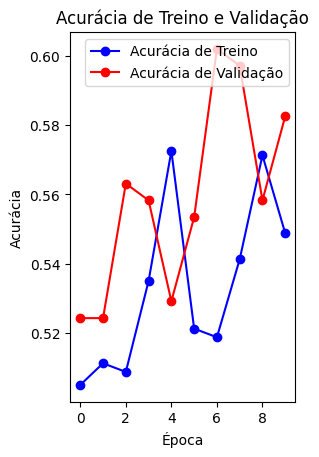

In [62]:
plt.subplot(1, 2, 1)
plt.plot(acc, 'bo-', label='Acurácia de Treino')
plt.plot(history.history['val_acc'], 'ro-', label='Acurácia de Validação')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

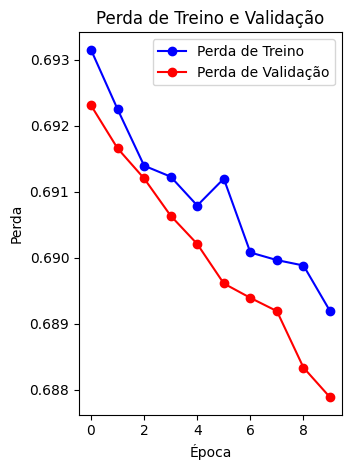

In [63]:
plt.subplot(1, 2, 2)
plt.plot(loss, 'bo-', label='Perda de Treino')
plt.plot(history.history['val_loss'], 'ro-', label='Perda de Validação')
plt.title('Perda de Treino e Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

In [64]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,    
    width_shift_range=0.05,  
    height_shift_range=0.05, 
    zoom_range=0.05, 
    horizontal_flip=True,
    fill_mode='nearest'
)

In [65]:
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(150, 150),     # Tamanho de imagem reduzido
    batch_size=8,               # Batch size reduzido para 8
    class_mode='binary',
    shuffle=True,
    seed=SEED
)

Found 800 images belonging to 2 classes.


In [66]:
validation_generator_aug = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),     # Tamanho de imagem reduzido
    batch_size=8,               # Batch size reduzido para 8
    class_mode='binary',
    shuffle=True,
    seed=SEED
)

Found 206 images belonging to 2 classes.
